In [13]:
##GET FUNCTIONS REQUIRED TO SHOW ON WEBSITE
import portfolio
import dataAck
import pandas as pd

In [60]:
import importlib
importlib.reload(portfolio)

<module 'portfolio' from '/home/prohb125/walkforwardTrader/portfolio.py'>

In [4]:
##GET ALL PORTFOLIOS
allPortfolios = portfolio.getPortfolios()
allPortfolios

[{'benchmark': 'VO',
  'description': 'VO 8-13-17',
  'key': '7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f'}]

In [5]:
## GET ALL MODELS IN PORTFOLIO
portfolioInfo = allPortfolios[0]
models = portfolio.getModelsByKey(portfolio.getPortfolioModels(portfolioInfo["key"]))
models

In [10]:
##DOWNLOAD REQUIRED DATA FOR TARGET TICKERS
tickersRequired = []
for mod in models:
    print(mod.describe())
    if mod.inputSeries.targetTicker not in tickersRequired:
        tickersRequired.append(mod.inputSeries.targetTicker)
    
pulledData, validTickers = dataAck.downloadTickerData(tickersRequired)

joinedData = dataAck.joinDatasets([pulledData[ticker] for ticker in pulledData])
joinedData

((10, ('TIP', 24, None, 15), 2, 'VO'), 10, 25)
((10, ('SHY', 30, None, None), 2, 'VO'), 10, 25)
((10, ('XLV', 31, None, 14), 2, 'VO'), 10, 50)
((22, ('IWF', 4, None, None), 3, 'VO'), 22, 25)
((10, ('SHY', 30, None, None), 3, 'VO'), 10, 25)
VO


,Adj_Close_VO
Date,
2004-01-30,39.639634
2004-02-02,39.924811
2004-02-03,39.768423
2004-02-04,39.326859
2004-02-05,39.428050
2004-02-06,40.117995
2004-02-09,40.182390
2004-02-10,40.274383
2004-02-11,40.725147


# PORTFOLIO DATA

In [84]:
##GENERATE RETURNS FOR PORTFOLIO
portfolioAllocations = portfolio.getPortfolioAllocations(portfolioInfo["key"])

In [85]:
predsTable = pd.DataFrame([])
weightsTable = pd.DataFrame([])
tickerAllocationsTable = pd.DataFrame([])
scaledTickerAllocationsTable = pd.DataFrame([])
for allocation in portfolioAllocations:
    colsAlgo = []
    valsAlgo = []
    colsAlgoWeight = []
    valsAlgoWeight = []
    colsTicker = []
    valsTicker = []
    colsTickerScaled = []
    valsTickerScaled = []
    
    for key in allocation:
        if key.startswith("ticker_"):
            colsTicker.append(key[len("ticker_"):])
            valsTicker.append(allocation[key])
        if key.startswith("scaled_ticker_"):
            colsTickerScaled.append(key[len("scaled_ticker_"):])
            valsTickerScaled.append(allocation[key])
        if key.startswith("algo_") and not key.startswith("algo_weight_"):
            colsAlgo.append(key[len("algo_"):])
            valsAlgo.append(allocation[key])
        if key.startswith("algo_weight_"):
            colsAlgoWeight.append(key[len("algo_weight_"):])
            valsAlgoWeight.append(allocation[key])
        
    predsTable = pd.concat([predsTable, pd.DataFrame([valsAlgo], index = [allocation["predictionDay"]], columns=colsAlgo).tz_localize(None)])
    weightsTable = pd.concat([weightsTable, pd.DataFrame([valsAlgoWeight], index = [allocation["predictionDay"]], columns=colsAlgoWeight).tz_localize(None)])
    tickerAllocationsTable = pd.concat([tickerAllocationsTable, pd.DataFrame([valsTicker], index = [allocation["predictionDay"]], columns=colsTicker).tz_localize(None)])
    scaledTickerAllocationsTable = pd.concat([scaledTickerAllocationsTable, pd.DataFrame([valsTickerScaled], index = [allocation["predictionDay"]], columns=colsTickerScaled).tz_localize(None)])
predsTable = predsTable.sort_index()
weightsTable = weightsTable.sort_index()
tickerAllocationsTable = tickerAllocationsTable.sort_index()
scaledTickerAllocationsTable = scaledTickerAllocationsTable.sort_index()

In [86]:
predsTable

,0b84734d97e005d3a2a3a06d82cb793ec1f7557573e3bc032fb7fdf3,11912f289e86b30f1af1b7272e773732dd099e3069cdf79f1c2ba47e,2c69141675447782e2a74036a7cbd8fb5fc08476cebf557bd6e787a6,341fe3e8eb88c9fbdd779c6c8727762f99fc1043383dd8242da044e9,78afec28d6c4e55102b09d8b6b179a3508e2b03fb46d2e8858c14fdc
2006-12-07,-0.054173,0.000000,-0.059411,0.000000,0.137561
2006-12-08,-0.053505,0.000000,-0.056038,0.000000,0.000000
2006-12-11,-0.026538,-0.341410,0.000000,-0.075764,-0.132883
2006-12-12,0.000000,0.000000,0.056702,-0.077772,0.000000
2006-12-13,0.027001,0.000000,0.057234,0.000000,0.000000
2006-12-14,0.052971,0.341031,0.054121,0.077080,-0.066883
2006-12-15,0.040490,0.739604,0.075541,0.033932,-0.055217
2006-12-18,0.022910,0.694519,0.083827,0.000000,0.000000
2006-12-19,0.000000,0.694586,0.000000,-0.037422,0.138450
2006-12-20,0.000000,0.695747,-0.083442,0.000000,0.137897


In [87]:
weightsTable

,0b84734d97e005d3a2a3a06d82cb793ec1f7557573e3bc032fb7fdf3,11912f289e86b30f1af1b7272e773732dd099e3069cdf79f1c2ba47e,2c69141675447782e2a74036a7cbd8fb5fc08476cebf557bd6e787a6,341fe3e8eb88c9fbdd779c6c8727762f99fc1043383dd8242da044e9,78afec28d6c4e55102b09d8b6b179a3508e2b03fb46d2e8858c14fdc
2006-12-07,0.054173,0.667635,0.059411,0.081219,0.137561
2006-12-08,0.053505,0.678703,0.056038,0.077939,0.133814
2006-12-11,0.053076,0.682820,0.055456,0.075764,0.132883
2006-12-12,0.053796,0.678765,0.056702,0.077772,0.132964
2006-12-13,0.054002,0.677624,0.057234,0.077511,0.133628
2006-12-14,0.052971,0.682062,0.054121,0.077080,0.133767
2006-12-15,0.040490,0.739604,0.075541,0.033932,0.110433
2006-12-18,0.045820,0.694519,0.083827,0.037404,0.138431
2006-12-19,0.045816,0.694586,0.083726,0.037422,0.138450
2006-12-20,0.045666,0.695747,0.083442,0.037248,0.137897


In [88]:
tickerAllocationsTable

,VO
2006-12-07,0.023978
2006-12-08,-0.109544
2006-12-11,-0.576596
2006-12-12,-0.021069
2006-12-13,0.084236
2006-12-14,0.458319
2006-12-15,0.834350
2006-12-18,0.801255
2006-12-19,0.795615
2006-12-20,0.750203


In [89]:
scaledTickerAllocationsTable

,VO
2006-12-07,1.0
2006-12-08,-1.0
2006-12-11,-1.0
2006-12-12,-1.0
2006-12-13,1.0
2006-12-14,1.0
2006-12-15,1.0
2006-12-18,1.0
2006-12-19,1.0
2006-12-20,1.0


# DAILY PERFORMANCE

In [67]:
def calculatePerformanceForTable(table, tickerOrder, joinedData):
    aggregatePerformance = None
    for i in range(len(tickerOrder)):
        dailyFactorReturn = dataAck.getDailyFactorReturn(ticker, joinedData)
        thisPerformance = table[[table.columns[i]]].join(dailyFactorReturn).apply(lambda x:x[0] * x[1], axis=1)
        thisPerformance = pd.DataFrame(thisPerformance, columns=[table.columns[i]])
        if aggregatePerformance is None:
            aggregatePerformance = thisPerformance
        else:
            aggregatePerformance = aggregatePerformance.join(thisPerformance)
    return aggregatePerformance.dropna()

In [71]:
tickerPerformance = calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)

In [90]:
scaledTickerPerformance = calculatePerformanceForTable(scaledTickerAllocationsTable, scaledTickerAllocationsTable.columns, joinedData)

In [72]:
##ALGO PERFORMANCE

##FORM HASH TO TICKER
hashToTicker = {}
for model in models:
    hashToTicker[portfolio.getModelHash(model)] = model.inputSeries.targetTicker

algoPerformance = calculatePerformanceForTable(predsTable,[hashToTicker[modelHash] for modelHash in predsTable.columns], joinedData)

# PERFORMANCE METRICS

In [74]:
import empyrical

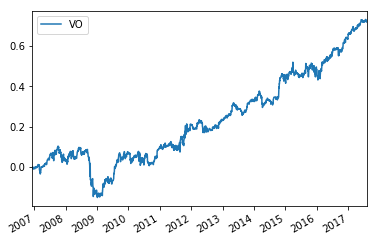

In [80]:
%matplotlib inline
empyrical.cum_returns(tickerPerformance).plot()

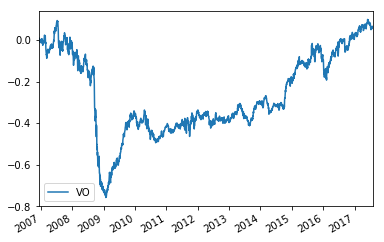

In [91]:
%matplotlib inline
empyrical.cum_returns(scaledTickerPerformance).plot()

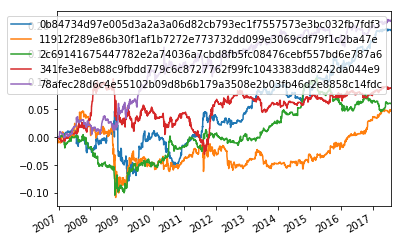

In [79]:
%matplotlib inline
empyrical.cum_returns(algoPerformance).plot()

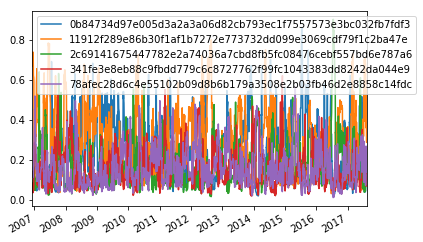

In [82]:
%matplotlib inline
weightsTable.plot()

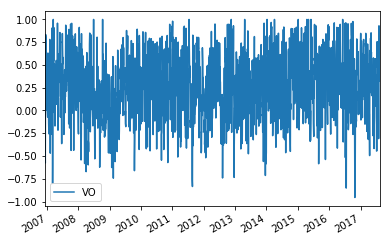

In [83]:
%matplotlib inline
tickerAllocationsTable.plot()

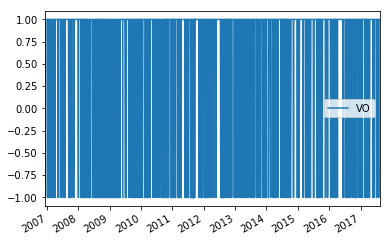

In [94]:
%matplotlib inline
scaledTickerAllocationsTable.plot()